**PAQUETERIAS NECESARIAS**

In [1]:
from modules.maquine_learning.Paq_ML import *
from modules.general.F_search import *
import math

INPUT = "/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon/DarkSUSY_USER.h5"
if os.path.exists(INPUT):
    hf = h5py.File(INPUT, 'r')
else:
    print(" :: Datos de entrada inexistentes:: ")
    sys.exit()

## ORGANIZAR LA ENTRADA DE DATOS**

variable = "Entries"  # Variable de interes
Card_config = "_CMS_"  # Configuración de la card
INPUT_CMS = None
INPUT_HL = None
OUTPUT_CMS = None
OUTPUT_HL = None

for MNeuL in hf.keys(): 
    MNeuD_all = hf.require_group(MNeuL)
    for MNeuD in MNeuD_all.keys():
        MPhoD_all = hf.require_group(MNeuL + "/" + MNeuD)
        for MPhoD in MPhoD_all.keys():
            TcPhoD_all = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD)
            for TcPhoD in TcPhoD_all.keys():
                Data_Card = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + 
                                             "/" + TcPhoD)
                for Card in Data_Card.keys():
                    FileROOT = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + 
                                                "/" + TcPhoD + "/" + Card)
                    # print(Card)
                    if len(np.array(FileROOT.get("Mu_Entries"))) < 1:
                        continue
                    # var in the respective root
                    var = Ob_Value(str(np.array(FileROOT.get("Name_of_FileROOT"))))
                    INPUT_TEMP = [var["MNeuL"], var["MNeuD"], var["MPhoD"], var["TcPhoD"]]
                    #if float(var["MNeuL"])>0:
                    #    continue
                    OUTPUT_TEMP = len(np.array(FileROOT.get("Mu_Entries")))

                    if var["Card"]=='_CMS_':
                        if INPUT_CMS is None:
                            INPUT_CMS = INPUT_TEMP
                            OUTPUT_CMS = OUTPUT_TEMP
                        else:
                            INPUT_CMS = np.vstack((INPUT_CMS, INPUT_TEMP ))
                            OUTPUT_CMS = np.vstack((OUTPUT_CMS, OUTPUT_TEMP))
                    elif var["Card"]=='_HL_':
                        if INPUT_HL is None:
                            INPUT_HL = INPUT_TEMP
                            OUTPUT_HL = OUTPUT_TEMP
                        else:
                            INPUT_HL = np.vstack((INPUT_HL, INPUT_TEMP ))
                            OUTPUT_HL = np.vstack((OUTPUT_HL, OUTPUT_TEMP))
                    else:
                        print(" :: Card no identificada :: ERROR ::")
hf.close()

In [61]:
def reduce(data1, data2, min_data):
    log = np.where(data2>min_data)[0]
    output1 = data1[log,:]
    output2 = data2[log]
    return output1, output2

# INPUT1=np.array(INPUT[:,1])
INPUT_CMS_R, OUTPUT_CMS_R = reduce(INPUT_CMS, OUTPUT_CMS, 5)
#REACONDICIONAR LA INFORMACION INPUT EN UNA MATRIX PARA SU RAPIDO ACCESO
X_train, X_test, Y_train, Y_test = train_test_split(
    INPUT_CMS_R, np.log(OUTPUT_CMS_R/100), test_size = .1, shuffle = True)

print(OUTPUT_CMS.shape,INPUT_CMS.shape)
print(OUTPUT_CMS_R.shape,INPUT_CMS_R.shape)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(1904, 1) (1904, 4)
(1817, 1) (1817, 4)
(1635, 4) (182, 4)
(1635, 1) (182, 1)


**ENTRENAMIENTO**

In [127]:
def regresion(X_train, Y_train, X_test=None, Y_test=None, ax=None, degree=5):
    poly_features = PolynomialFeatures(degree=degree)
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
    print("The model performance for the training set")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    if X_test is not None and Y_test is not None:
        # evaluating the model on test dataset
        rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
        r2_test = r2_score(Y_test, y_test_predict)
        print("\n")
        print("The model performance for the test set")
        print("RMSE of test set is {}".format(rmse_test))
        print("R2 score of test set is {}".format(r2_test))
        if ax is None:
            plt.plot(np.exp(Y_test), np.exp(y_test_predict), '.')
        else:
            ax.plot(np.exp(Y_test), np.exp(y_test_predict), '.')
        return poly_model, rmse_train, r2_train, rmse_test, r2_test, ax
    return poly_model, rmse_train, r2_train

The model performance for the training set
RMSE of training set is 0.07095387840370006
R2 score of training set is 0.9954703164716313


The model performance for the test set
RMSE of test set is 0.6865464968574947
R2 score of test set is 0.7699341898763437


/home/franky8939/PROGRAMAS/anaconda3/envs/py37root/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:1508: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  n_samples, n_features = check_array(X, accept_sparse=True).shape
/home/franky8939/PROGRAMAS/anaconda3/envs/py37root/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:1508: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  n_samples, n_features = check_array(X, accept_sparse=True).shape


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 0.07095387840370006,
 0.9954703164716313,
 0.6865464968574947,
 0.7699341898763437,
 None)

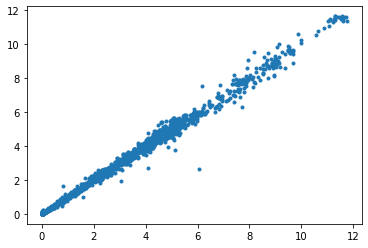

In [129]:
# np.exp(model.predict(INPUT_CMS)), (OUTPUT_CMS)/100
regresion(X_train, Y_train, INPUT_CMS, np.log(OUTPUT_CMS/100), degree=8)
# regresion(INPUT_CMS,  np.log(OUTPUT_CMS/100), INPUT_CMS, np.log(OUTPUT_CMS/100), degree=5)
# regresion(X_train, Y_train, X_test, Y_test, degree=6)
# regresion(X_train, Y_train, X_test, Y_test, degree=4)
# regresion(X_train, Y_train, X_test, Y_test, degree=5)

In [ ]:
import pandas as pd
from sklearn import linear_model
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


"Creates a polynomial regression model for the given degree"
degree = 6

poly_features = PolynomialFeatures(degree=degree)
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

plt.plot(Y_test, (y_test_predict), 'o')
plt.show()

In [135]:
# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense
# generate regression dataset
# X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
# X = INPUT_LINEAL
# y = OUTPUT_LINEAL
#scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
#scalarX.fit(X)
#scalarY.fit(y)
#X = scalarX.transform(X)
#y = scalarY.transform(y)
# define and fit the final model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, Y_train, epochs=1000, verbose=0)

In [136]:
# print(X.shape)
print(model.predict(np.array([[10, 1, 0.25, 10]])), np.exp(model.predict(np.array([[10, 1, 0.25, 100]]))))
print(model.predict(np.array([[20, 2, 0.25, 10]])), np.exp(model.predict(np.array([[20, 2, 0.25, 100]]))))
print(model.predict(np.array([[20, 3, 0.25, 10]])), np.exp(model.predict(np.array([[20, 3, 0.25, 100]]))))
print(model.predict(np.array([[20, 4, 0.25, 10]])), np.exp(model.predict(np.array([[20, 4, 0.25, 100]]))))
print(model.predict(np.array([[20, 5, 0.25, 10]])), np.exp(model.predict(np.array([[20, 5, 0.25, 100]]))))
print(model.predict(np.array([[20, 6, 0.25, 10]])), np.exp(model.predict(np.array([[20, 6, 0.25, 100]]))))
print(model.predict(np.array([[20, 7, 0.25, 10]])), np.exp(model.predict(np.array([[20, 7, 0.25, 100]]))))
print(model.predict(np.array([[20, 8, 0.25, 10]])), np.exp(model.predict(np.array([[20, 8, 0.25, 100]]))))
print(model.predict(np.array([[20, 9, 0.25, 10]])), np.exp(model.predict(np.array([[20, 9, 0.25, 100]]))))
print(" ")
print(model.predict(np.array([[10, 1, 0.25, 10]])), np.exp(model.predict(np.array([[20, 1, 1, 1]]))))
print(model.predict(np.array([[20, 1, 0.25, 10]])), np.exp(model.predict(np.array([[20, 1, 1, 10]]))))
print(model.predict(np.array([[30, 1, 0.25, 10]])), np.exp(model.predict(np.array([[20, 1, 1, 30]]))))
print(model.predict(np.array([[40, 1, 0.25, 10]])), np.exp(model.predict(np.array([[20, 1, 1, 50]]))))
print(model.predict(np.array([[50, 1, 0.25, 10]])), np.exp(model.predict(np.array([[20, 1, 1, 100]]))))
# plt.plot(model.predict(INPUT_CMS),OUTPUT_CMS/100, "o")
# print(r2_score(model.predict(INPUT_CMS),OUTPUT_CMS/100))
# min(model.predict(INPUT_CMS))

[[0.59643316]] [[0.08052663]]
[[0.762415]] [[0.07850611]]
[[0.83555955]] [[0.07545119]]
[[0.90870494]] [[0.07251538]]
[[0.85826045]] [[0.06969368]]
[[0.80238134]] [[0.06698181]]
[[0.74650216]] [[0.06437551]]
[[0.6700483]] [[0.0618706]]
[[0.58205634]] [[0.05946309]]
 
[[0.59643316]] [[6.014519]]
[[0.68926895]] [[4.611663]]
[[0.78210664]] [[1.8650469]]
[[0.8749432]] [[0.92368585]]
[[0.96777636]] [[0.27892324]]


In [137]:
# print(r2_score(model.predict(INPUT_CMS),OUTPUT_CMS/100))
print(r2_score(np.exp(model.predict(INPUT_CMS)),OUTPUT_CMS/100))

0.9571527958833546


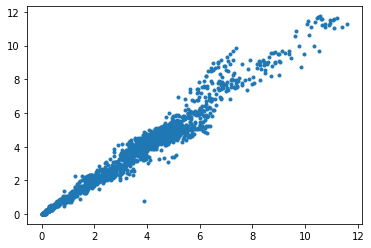

In [138]:
plt.plot(np.exp(model.predict(INPUT_CMS)), (OUTPUT_CMS)/100, ".")
#np.min(model.predict(X_test))

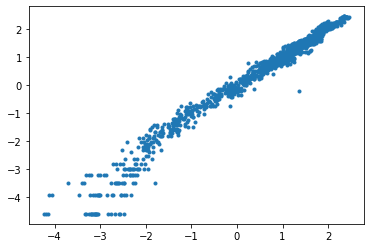

In [139]:
plt.plot(model.predict(INPUT_CMS), np.log((OUTPUT_CMS)/100), ".")

In [81]:
np.exp(model.predict(INPUT_CMS))
(OUTPUT_CMS)

array([[881],
       [916],
       [895],
       ...,
       [440],
       [531],
       [420]])